<a href="https://colab.research.google.com/github/franciscojferrari/AUTOVC/blob/speaker-encoder/experiments_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import SpeechEncoder as se

import numpy as np
from SpeechEncoder import SpeechEmbedder,GE2ELoss
import importlib
from speaker_encoder_utils import * 
importlib.reload(se)

<module 'SpeechEncoder' from '/content/SpeechEncoder.py'>

## Experiments with random data

Experiment with random data Speech Embedder

In [2]:
#Speech Embedder experiment
number_of_speakers = 12
utterances_per_speaker = 10
data_points = number_of_speakers *utterances_per_speaker #Number of utterances
dimension = 13 #Number of time steps
time_steps = 3 #Feature dimension
data = np.random.rand(data_points,time_steps,dimension)
model = se.SpeechEmbedder(time_steps, dimension)
prediction = model.call(data)
prediction = tf.reshape(prediction,(number_of_speakers,utterances_per_speaker,256))
prediction.shape

TensorShape([12, 10, 256])

Experiment with random data GE2ELoss

In [3]:
loss_model = se.GE2ELoss()
loss = loss_model(prediction)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=6476.1763>

## Load data

Mounting the bucket

In [4]:
from google.colab import auth
auth.authenticate_user()

In [5]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  93962      0 --:--:-- --:--:-- --:--:-- 93962
OK
76 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.35.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


In [6]:
!mkdir DataSet
!gcsfuse autovc_datasets DataSet

mkdir: cannot create directory ‘DataSet’: File exists
2021/05/03 07:29:59.419067 Using mount point: /content/DataSet
2021/05/03 07:29:59.427691 Opening GCS connection...
2021/05/03 07:29:59.902179 Mounting file system "autovc_datasets"...
2021/05/03 07:29:59.902752 File system has been successfully mounted.


Read the data

In [7]:
! pip install -q tensorflow-io

In [8]:
import DataProcessing as dp
from utils import *
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow_io as tfio
import tensorflow as tf
import importlib
import yaml

from google.colab import auth
from pathlib import Path
from tqdm import tqdm 

In [9]:
config = yaml.load(Path("config.yml").read_text(), Loader=yaml.SafeLoader)
bucket_name = config["bucket_name"]  # Name of how bucket is mounted
datasets = ["dev-clean"] # empty for vctk since there is just one
reader = dp.DataReader(config)
reader.load_datasets()

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=237>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x07\x12\x00B\x05train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\n\x12\x03\x08\xbb\x02\x12\x03\x08\x80\x01"\x80\xec\t\x00\x00\x00\x00\xdaO\xc5=\xc7u\xf3<\xb0\xc1\x88=I*&=\xf4\x9e\xe6;V\xde\xb0;\xaa\xc6\xcc<\xa4\xbf\x8e<"\x89\x8e<\x88w\x02<\x8c\x18\x04<-\xc0\xba;\xd6)K=\xf7\xd5\xa0<\xec}\n=\x92L\xc1<\xc4\x86a<\x99\xeb\x0f=*\xdb\xf2<\xcfG\xe8<\xf2p\xca=\xf7\xd0\xd7<d\xc1\xcd<\'\x07\x02=M\xa8I<l\xed\x9e<&\xb2\xfb<\x0b\x81\xa6=\xc2\xa3\xb5=\xb5\xac\xb5=_}\xaf=U\xfb\x87=U\xe3\xa3</\xc0\xb8<\xa6\x17\xfd<{P\x16=\xdf\xcd\xc0<\x120\x07=2\xc8-=\xd4,l=\x06t|=g\x8b\x1f=\x08\xda7=\xbaVS=*\xf3C=\xa0A\xec<A\xdf\x14=\xf4&C=`\x10\t==\xdf\x0e=Y\xf2t=\xd0-\x01=\t@<=\xa2\xd3\x92=\x99\x1f\xf7=\x95+\x1c>a\x8d\xec=\xa6$:=\xa6G9>pA\x81>+e\\>D?\x1f>7\xc2\x10>_\xc0V>\x82\x7f*>\xb2Z\xf8=e\r(>\x86f0>N\x00\x17>\xba\x04<>\xda\x96\x16>\x15\xc2\x8b<\xda\xb7G

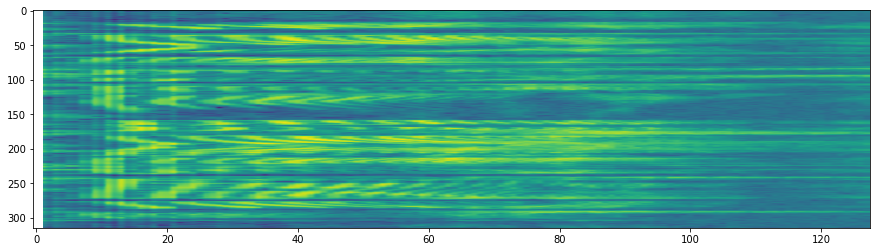

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=237>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x07\x12\x00B\x05train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\n\x12\x03\x08\x85\x03\x12\x03\x08\x80\x01"\x80\x94\x0c\x00\x00\x00\x00\x08i\x10=\x81/2<\xf3\x03\xff<i\xed\x9a<G{\x15<\x1eH\xe5;\xd2\xc9\t;}\x1a\xc0:\xa3|a;\xfdd\xce:\\\xb9\xa4;\rH\x9c:\x05\xe5l;`\xe9\xd0:\x8b\xe33;\xe2\x13\x88;ye\x02;\xdfE%;\xa6\x89N;?2:;\xa3Y\xce;\xf3\xfa\x95:b\xf0\xa9:{\xcd(;@\xf2\x1d;\x9d\xf9\x05;\xff6\x0e;\x1f\x8aK;\x10\x0e];\xb6\xd1};\xcfnp;\xfc$6;V\t\x0b;\xc8\x04D;\x1c\x8a\x8c;\xd6\xb6\xa9;\xe2\xf1\x86;\xbc\x8f\\;\xcf9V;Vhd;\xbf\x03\x18;N\xc1\xaf:\xca,\xa9:V^z:X\xc6Y;\x1es\x84;y\xf9\xdf:\x19Pc;w\x90x;3\x90`;\xcf\x1e@;cL\xfc:\xa6\xfas;]\xce\xc5;i\x80Z;LD/;\x05$\x17;\x9e\xd5\\;f\x01\x94;\xbc\x07K;j\x13<;\xb1\xae1;\xf7Y^:\xe4\x99\xca:l\xf1\xcd;\xe5\xb9\xf1;I?\xce;\x08* ;br";\xaf\x82M;\x9e\xde\xae;\xaa\xb3*;\x1c\x88\x8b;\xab\xc3\xb4;\xf9\x03\xa

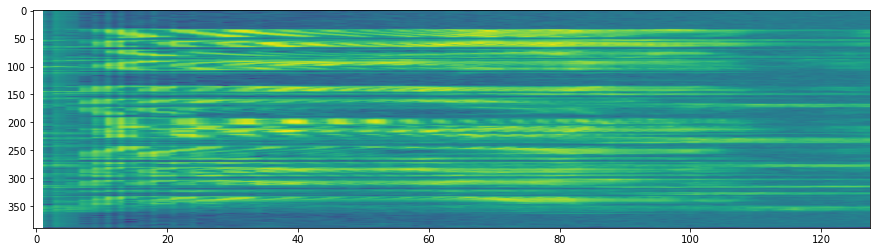

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=237>, 'subset': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x07\x12\x00B\x05train'>, 'mel_spectrogram': <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\x08\x01\x12\n\x12\x03\x08\xc0\x02\x12\x03\x08\x80\x01"\x80\x80\n\x00\x00\x00\x00\xc63\x17=\xea\x90:<\xf9\xac\xa4<\x8b\x16H<\x852\x97<\xda\xe9g<7\x19\xbe<U\x84\x84<\xb6\xf4\x07=y\xe3x<n\xfd\x0e=\x80\xea\x02<\x8f1\xb2<~\xaf.<\xe5j\x96<\xa9\xf7\x83<~\xe4\x15<sD\xb3<\xc4*\xe1;\xf9E\xbe;\xd2\xa2\x8c;\xa1\xb3\xcb:\xfc\r\x13;c\xc0\xce;Y-\x14<L\xc6\x91;\x86T{;\xbc\x95x<!WG<w|\x90;\x9a\x9a\x85;\xb5A\t<;\xe1\x86<\xd7\xea\xa0<\xd5\x10r<\rc0<s\xcd6<6F\\<\xb2\x08=<Q\xbdX<\x9f\x9a\xa6<\xf1Q\x83<C\xea+<_;6<\xf5\x9d\x83<\xbb"\x97<\xd1[\x8e<!\xc9p<rx\x01<\x18\x98\x93;RI/<W\xee\x07<\x9f\xbb^<\xd9r\xa3<\xa56\x91<\xf4\x153<B\x88\xdf;\xc5B\xc3<\x8d\x1a\xe5<\xf9\xde\x96<\x96\x0bz<\x00a6<\x06\xf3\xab<aaV<\x80\xb9\xe5;\xca\x9c\xb6;MxX<-\xb7\x97<$\xb0\xb0<\x8c|\xbc<\x9c\xf7\x1f<+\\%<b\x9cb<`\xf3r<\x

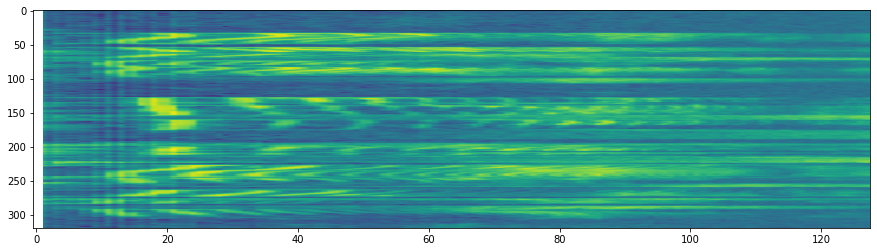

In [10]:
datasets = reader.get_datasets()
dataset = datasets["237"]
for example in dataset.take(3):
  print(example)

  # Parse the specgrogram (binary -> tensor)
  example = parse_spectrograms(example)

  # Plot spectrogram
  tensor = example["mel_spectrogram"]
  plt.figure(figsize=(15,4))
  data = tf.math.log(tensor).numpy()
  plt.imshow(data, aspect="auto")
  plt.show()

## Experiments with real data

In [11]:
number_of_speakers = 4
utterances_per_speaker = 3
batch = create_batches(reader.datasets,number_of_speakers,utterances_per_speaker)
padded = batch.to_tensor(-1.)

data_points = padded.shape[0]
dimension = padded.shape[2]
time_steps = padded.shape[1]   #Number of time steps


6313
2412
1580
2277


In [12]:
model = se.SpeechEmbedder(time_steps, dimension)
prediction = model(padded)
prediction = tf.reshape(prediction,(number_of_speakers,utterances_per_speaker,256))
prediction.shape
print(type(prediction))
loss_model = se.GE2ELoss()
loss = loss_model(prediction)
loss

<class 'tensorflow.python.framework.ops.EagerTensor'>


<tf.Tensor: shape=(), dtype=float32, numpy=74.31554>

## Training the model

In [13]:
model(padded,training=True)

<tf.Tensor: shape=(12, 256), dtype=float32, numpy=
array([[0.        , 0.11827703, 0.        , ..., 0.06456934, 0.        ,
        0.19845538],
       [0.        , 0.08475592, 0.        , ..., 0.03841748, 0.02379977,
        0.16434385],
       [0.        , 0.09277073, 0.        , ..., 0.03218331, 0.03252354,
        0.18392287],
       ...,
       [0.        , 0.08114086, 0.        , ..., 0.02231684, 0.01624789,
        0.17163888],
       [0.        , 0.08870564, 0.        , ..., 0.00809939, 0.02115156,
        0.1681351 ],
       [0.        , 0.08336513, 0.        , ..., 0.03873239, 0.04134429,
        0.18010968]], dtype=float32)>

In [18]:
def calculate_loss_test(sim_matrix):
    same_idx = list(range(sim_matrix.shape[0]))
    pos = tf.stack([sim_matrix[i,:,i] for i in same_idx], axis=0) 
    print(pos.shape)
    #pos = tf.transpose(pos)
    #check https://stackoverflow.com/questions/43798951/getting-values-in-multiple-indices-from-a-tensor-at-once-in-tensorflow
    #sim_matrix = sim_matrix.numpy()
    #pos = sim_matrix[same_idx, :, same_idx]
    in_neg = tf.math.exp(sim_matrix)
    neg = tf.math.log(tf.math.reduce_sum(in_neg,axis=2)+ 1e-6)
    #neg = np.log(np.sum(in_neg,axis=2)+ 1e-6)
    per_embedding_loss = -1 * (pos - neg)
    #per_embedding_loss = neg
    #loss = sim_matrix.sum()
    loss_value = tf.reduce_sum(per_embedding_loss)
    return loss_value

In [19]:
from utils import *
def loss_test(inputs):
    w = tf.Variable(initial_value=10.0, trainable=True)
    b = tf.Variable(initial_value=-5.0, trainable=True) 
    # constrain w > 0, to have larger similarity when cosine similarity is larger.
    tf.clip_by_value(w, clip_value_min=1e-6, clip_value_max=np.inf)
    centroids = speaker_centroids(inputs)
    ut_centroids = utterance_centroids(inputs)
    coss_sim = similarity_matrix(inputs, centroids, ut_centroids)
    sim_matrix = w * coss_sim + b
    loss = calculate_loss_test(sim_matrix)
    return loss

In [20]:
importlib.reload(se)
import keras
epochs = 2
train_dataset = [padded]
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model = se.SpeechEmbedder(time_steps, dimension)

#loss = se.GE2ELoss()

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    for step, x_batch_train in enumerate(train_dataset):
        print(type(x_batch_train))
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            logits = tf.reshape(logits,(number_of_speakers,utterances_per_speaker,256))
            print(f"Shape of logits: {logits.shape}")
            #loss_value = tf.reduce_sum(logits)
            #loss_value = loss(logits)
            loss_value = loss_test(logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        print(grads)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Log every 200 batches.
        
        print(
            "Training loss (for one batch) at step %d: %.4f"
            % (step, float(loss_value))
        )
        break


Start of epoch 0
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape of logits: (4, 3, 256)
(4, 3)
[<tf.Tensor: shape=(128, 3072), dtype=float32, numpy=
array([[-1.1919229e-04,  6.2381633e-04, -9.2962157e-04, ...,
        -4.0548874e-04, -4.6510305e-03,  2.4837730e-03],
       [-2.9879253e-04,  1.4618061e-03, -1.4038162e-03, ...,
        -1.8808187e-03, -8.9871390e-03,  4.8412066e-03],
       [-1.4129737e-04,  5.8191095e-04, -6.1645528e-04, ...,
        -1.7025553e-03, -7.3132953e-03,  3.3096552e-03],
       ...,
       [ 2.9037822e-06,  2.8650283e-03,  1.8268364e-03, ...,
         2.1249359e-03,  1.3124626e-02,  1.0192647e-03],
       [ 1.3421706e-05,  2.8815165e-03,  1.8175917e-03, ...,
         2.1074603e-03,  1.3127881e-02,  1.0148800e-03],
       [-6.4321762e-06,  2.8781949e-03,  1.8256725e-03, ...,
         2.1131311e-03,  1.3128709e-02,  1.0152367e-03]], dtype=float32)>, <tf.Tensor: shape=(768, 3072), dtype=float32, numpy=
array([[ 6.8459456e-05, -4.9967086e-04, -4.6469

In [17]:
import keras
epochs = 2
train_dataset = [padded]
model = se.SpeechEmbedder(time_steps, dimension)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    for step, x_batch_train in enumerate(train_dataset):
        print(type(x_batch_train))
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = model.loss(logits)
            print(f"Shape of logits: {logits.shape}")
        grads = tape.gradient(loss_value, model.trainable_variables)
        print(grads)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Log every 200 batches.
        
        print(
            "Training loss (for one batch) at step %d: %.4f"
            % (step, float(loss_value))
        )


Start of epoch 0
<class 'tensorflow.python.framework.ops.EagerTensor'>


KeyboardInterrupt: ignored

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
) 

In [25]:
importlib.reload(se)
model.layers[0]